# Homework 3_1
## Optimizaition via Gradient Descend

### Write a script that implement the GD algorithm, with the following structure:

     Input:
         f: the function f(x) we want to optimize.
            It is supposed to be a Python function, not an array.
         grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
         x0: an n-dimensional array which represents the initial iterate.
         kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
         tolf: small float. The relative tollerance of the algorithm.
               Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
         tolx: small float. The tollerance in the input domain.
               Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
               Pay attention to to the first iterate.
     Output:
         x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
         k: an integer. The number of iteration needed to converge. k < kmax.
         f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
         grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
         err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.
         
For the moment, consider a fixed value of $α > 0$.

* For each of the functions, run the GD method with and without the backtracking, trying different values for the step size $α > 0$ when you are not using backtracking. Observe the different behavior of GD.
* To help visualization, it is convenient to plot the error vector that contains the $||∇f(xk)||_2$, to check that it goes to zero. Compare the convergence speed (in terms of the number of iterations $k$) in the different cases.
* For each of the points above, fix $x_0= (0, 0, . . . , 0)^T$ , $kmax = 100$, while choose your values for tolf and tolx. It is recommended to also plot the error $||xk − x^∗||_2$ varying $k$ when the true $x^∗$ is available.
* Only for the non-convex function defined in 5, plot it in the interval $[−3, 3]$ and test the convergence point of GD with different values of $x0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
def Backtracking(f_, grad_f_, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while (f_(x - alpha * grad_f_(x)) > f_(x) - c * alpha * np.linalg.norm(grad_f_(x)) ** 2):   #condition of sufficient decrease
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
        
    return alpha

In [3]:
def GradientDescent(f_: object, grad_f_: object, x0_, kmax_, tolf_, tolx_, alpha_ = 1, backtracking = False):
    
    x0 = np.array(x0_)
    
    k = 0                                                                                       #iteration counter
    x = [x0]                                                                                    #array that contains the values of x_k at each iteration
    f_val = [f_(x0)]                                                                            #contains the f function values at each iteration
    err = [np.linalg.norm(grad_f_(x0))]                                                         #contains the value of ||grad_f(x_k)|| at each iteration
    grads = [grad_f_(x0)]                                                                       #contains the value of grad_f(x_k) at each iteration
    
    condition = True
    condition3 = True                                                                            #for k = 0, condition3 is not checked
    while condition:
        condition1 = k < kmax_
        condition2 = np.linalg.norm(grads[-1]) > np.linalg.norm(tolf_ * grad_f_(x0))
        if k != 0:
            condition3 = np.linalg.norm( np.array(x[-1]) - np.array(x[-2]) ) > tolx_            #x[-1] is x_k, x[-2] is x_k-1
        
        condition = (condition1 and condition2 and condition3)                                  #conditions to stop the algorithm
        
        
        if backtracking:                                                               
            alpha = Backtracking(f_, grad_f_, x[-1])                                            #x[-1] is x_k
        else:                                                                                   #if backtracking = False, fixed alpha is used
            alpha = alpha_
        
        x_k1 = x[-1] - alpha * grads[-1]                                                         #x_k1 is x_k+1
        
        x.append(x_k1)
        f_val.append(f_(x[-1]))
        grads.append(grad_f_(x[-1]))
        err.append(np.linalg.norm(grad_f_(x[-1])))
        
        k += 1
        
    return x, k, f_val, grads, err

$\|x_k - x_{true}\|$ when $x_{true}$ available.

In [4]:
#true error varying k___________________________________
def true_error(x_, x_true_, iterations_):
    
    x_true = np.array(x_true_)
    
    true_err = []
    for i in range(iterations_):
        x_k = x_[i]
        true_err.append(np.linalg.norm(x_k - x_true))                                        #for each iteration x_k true error
    
    return true_err

### Test algorithm with function 1:
$f : R^2 → R$ such that:
$$f(x1,x2)=(x1 −3)^2 +(x2 −1)^2$$
for which the true optimum is $x^∗ = (3, 1)^T $

In [5]:
def f1(x_):
    x1 = x_[0]
    x2 = x_[1]
    
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f1(x_):
    x1 = x_[0]
    x2 = x_[1]
    
    grad = np.empty(len(x_))
    
    grad[0] = 2*(x1-3)
    grad[1] = 2*(x2-1)

    return np.array(grad)

In [6]:
x0 = [0,0]
kmax = 100

In [7]:
#try with different tollerances and step sizes
tolf = [1e-6, 1e-3]
tolx = [1e-6, 1e-3]
alpha = [0.05, 0.1, 0.5, 1]

x_tol0 = []
x_tol1 = []
k_tol0 = []
k_tol1 = []
f_val_tol0 = []
f_val_tol1 = []
grads_tol0 = []
grads_tol1 = []
err_tol0 = []
err_tol1 = []

for i in range(len(alpha)):
    x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f1, grad_f1, x0, kmax, tolf[0], tolx[0], alpha[i])
    x_tol0.append(x_i)
    k_tol0.append(k_i)
    f_val_tol0.append(f_val_i)
    grads_tol0.append(grads_i)
    err_tol0.append(err_i)
    
    x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f1, grad_f1, x0, kmax, tolf[1], tolx[1], alpha[i])
    x_tol1.append(x_i)
    k_tol1.append(k_i)
    f_val_tol1.append(f_val_i)
    grads_tol1.append(grads_i)
    err_tol1.append(err_i)
    
#now do with backtracking
x_bck_tol0, k_bck_tol0, f_val_bck_tol0, grads_bck_tol0, err_bck_tol0 = GradientDescent(f1, grad_f1, x0, kmax, tolf[0], tolx[0], backtracking=True)
x_bck_tol1, k_bck_tol1, f_val_bck_tol1, grads_bck_tol1, err_bck_tol1 = GradientDescent(f1, grad_f1, x0, kmax, tolf[1], tolx[1], backtracking=True)

for i in range(len(alpha)):
    print('alpha = ', alpha[i])
    print('Number of iterations with tol = 1e-6: ', k_tol0[i])
    print('Number of iterations with tol = 1e-3: ', k_tol1[i])
    print('----------------------------------')
    
#print backtracking results
print('Backtracking results:')
print('Number of iterations with tol = 1e-6: ', k_bck_tol0)
print('Number of iterations with tol = 1e-3: ', k_bck_tol1)
print('----------------------------------')

#true optimum is (3,1)
x_true = [3, 1]
real_tol0 = []
real_tol1 = []

#error varying k
for i in range(len(alpha)):
    real_tol0.append(true_error(x_tol0[i], x_true, k_tol0[i]))
    real_tol1.append(true_error(x_tol1[i], x_true, k_tol1[i]))

#backtracking true error
real_bck_tol0 = true_error(x_bck_tol0, x_true, k_bck_tol0)
real_bck_tol1 = true_error(x_bck_tol1, x_true, k_bck_tol1)




alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  57
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  62
Number of iterations with tol = 1e-3:  31
----------------------------------
alpha =  0.5
Number of iterations with tol = 1e-6:  2
Number of iterations with tol = 1e-3:  2
----------------------------------
alpha =  1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  99
Number of iterations with tol = 1e-3:  47
----------------------------------


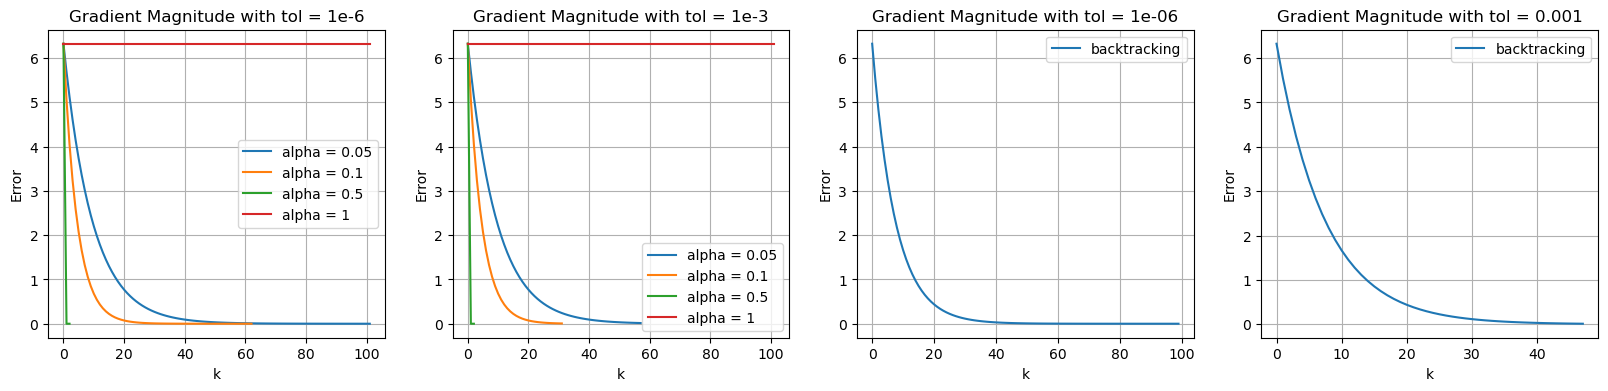

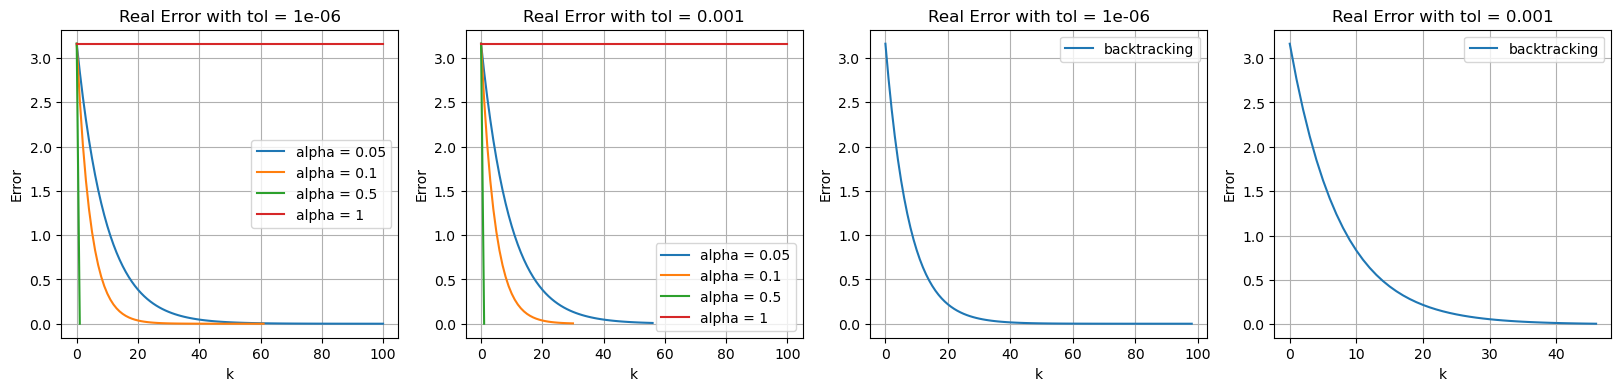

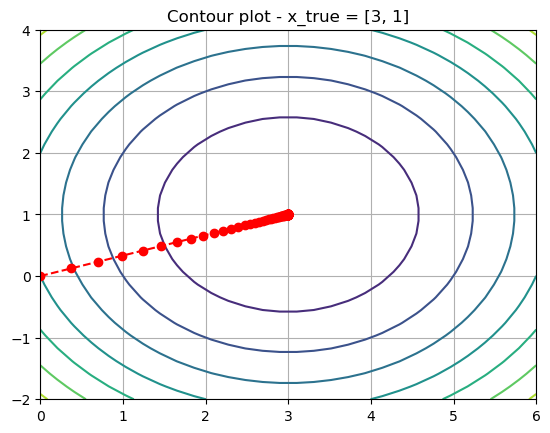

In [8]:

#plot gradient magnitude
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol0[i]+1), err_tol0[i], label = 'alpha = ' + str(alpha[i]))
plt.title('Gradient Magnitude with tol = 1e-6')    
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
    
    
plt.subplot(1, 4, 2)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol1[i]+1), err_tol1[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title('Gradient Magnitude with tol = 1e-3')    
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()


plt.subplot(1, 4, 3)
plt.plot(range(0,k_bck_tol0+1), err_bck_tol0, label = 'backtracking')
plt.title(f'Gradient Magnitude with tol = {tolf[0]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()


plt.subplot(1, 4, 4)
plt.plot(range(0,k_bck_tol1+1), err_bck_tol1, label = 'backtracking')
plt.title(f'Gradient Magnitude with tol = {tolf[1]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

#plot real error
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol0[i]), real_tol0[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title(f'Real Error with tol = {tolf[0]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.subplot(1, 4, 2)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol1[i]), real_tol1[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title(f'Real Error with tol = {tolf[1]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.subplot(1, 4, 3)
plt.plot(range(0,k_bck_tol0), real_bck_tol0, label = 'backtracking')
plt.title(f'Real Error with tol = {tolf[0]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.subplot(1, 4, 4)
plt.plot(range(0,k_bck_tol1), real_bck_tol1, label = 'backtracking')
plt.title(f'Real Error with tol = {tolf[1]}')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

xv = np.linspace(0, 6, 30)                                                          #making x_true the center of the plot
yv = np.linspace(-2, 4, 30)
xx, yy = np.meshgrid(xv, yv)
#Compute the value of f over the grid
zz = f1([xx, yy])
plt.contour(xx, yy, zz)
x_arr = np.array(x_bck_tol0)                                                        #x_vals is the array of x_k values
plt.plot(x_arr[:, 0], x_arr[:, 1], '--ro')
plt.title(f"Contour plot - x_true = {x_true}")
plt.grid()

plt.show()

* Consideration: comparing the convergence speed in number of iterations we can see that backtracking takes longer than fixed alpha = 0.1.
While we see that fixing alpha to 0.5 it only takes two iterations to meet the stopping criterias.
With the choice of $\alpha = 1$ the algorithm never converges and it is stopped for kmax iterations.

### Test algorithm with function 2:
$f : R^2 → R$ such that:
$$f(x1,x2)= 10(x_1 - 1)^2 + (x_2 - 2)^2 $$
for which the true optimum is $ x^* = (1, 2)^T$

In [9]:
def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2    

def grad_f2(x):
    grad = np.empty(len(x))
    grad[0] = 20*(x[0]-1)
    grad[1] = 2*(x[1]-2)
    
    return np.array(grad)

In [10]:
#try with different tollerances and step sizes
tolf = [1e-6, 1e-3]
tolx = [1e-6, 1e-3]
alpha = [1e-3, 1e-2, 0.05, 0.1]

x_tol0 = []
x_tol1 = []
k_tol0 = []
k_tol1 = []
f_val_tol0 = []
f_val_tol1 = []
grads_tol0 = []
grads_tol1 = []
err_tol0 = []
err_tol1 = []

#try with different values of alpha
for i in range(len(alpha)):
    x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f2, grad_f2, x0, kmax, tolf[0], tolx[0], alpha[i])
    x_tol0.append(x_i)
    k_tol0.append(k_i)
    f_val_tol0.append(f_val_i)
    grads_tol0.append(grads_i)
    err_tol0.append(err_i)
    
    x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f2, grad_f2, x0, kmax, tolf[1], tolx[1], alpha[i])
    x_tol1.append(x_i)
    k_tol1.append(k_i)
    f_val_tol1.append(f_val_i)
    grads_tol1.append(grads_i)
    err_tol1.append(err_i)
    
#now do with backtracking
x_bck_tol0, k_bck_tol0, f_val_bck_tol0, grads_bck_tol0, err_bck_tol0 = GradientDescent(f2, grad_f2, x0, kmax, tolf[0], tolx[0], backtracking=True)
x_bck_tol1, k_bck_tol1, f_val_bck_tol1, grads_bck_tol1, err_bck_tol1 = GradientDescent(f2, grad_f2, x0, kmax, tolf[1], tolx[1], backtracking=True)

for i in range(len(alpha)):
    print('alpha = ', alpha[i])
    print('Number of iterations with tol = 1e-6: ', k_tol0[i])
    print('Number of iterations with tol = 1e-3: ', k_tol1[i])
    print('----------------------------------')
    
#print backtracking results
print('Backtracking results:')
print('Number of iterations with tol = 1e-6: ', k_bck_tol0)
print('Number of iterations with tol = 1e-3: ', k_bck_tol1)
print('----------------------------------')


#true optimum is 
x_true = [1, 2]

real_tol0 = []
real_tol1 = []

#error varying k
for i in range(len(alpha)):
    real_tol0.append(true_error(x_tol0[i], x_true, k_tol0[i]))
    real_tol1.append(true_error(x_tol1[i], x_true, k_tol1[i]))

#backtracking true error
real_bck_tol0 = true_error(x_bck_tol0, x_true, k_bck_tol0)
real_bck_tol1 = true_error(x_bck_tol1, x_true, k_bck_tol1)

alpha =  0.001
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
alpha =  0.01
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  52
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  98
Number of iterations with tol = 1e-3:  46
----------------------------------


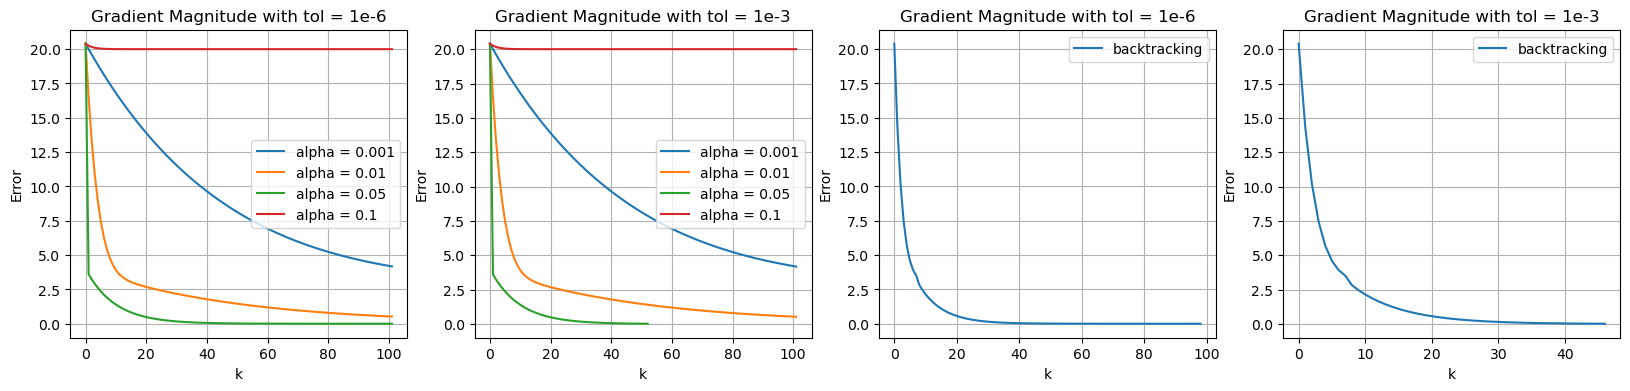

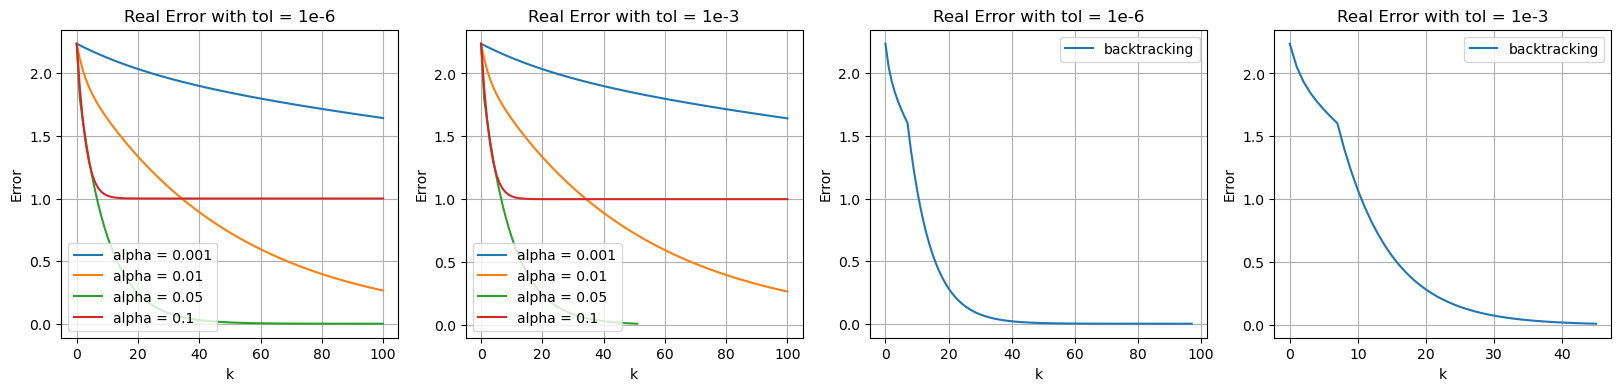

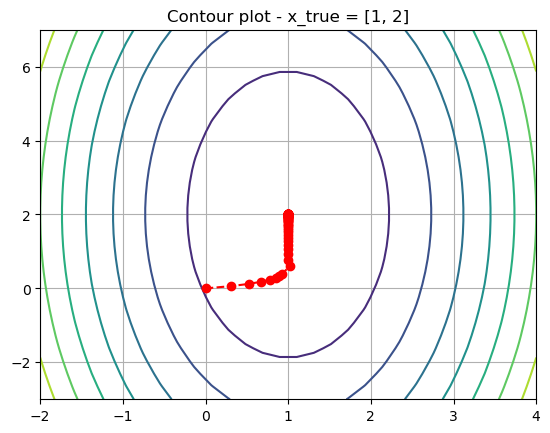

In [11]:

#plot gradient magnitude
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol0[i]+1), err_tol0[i], label = 'alpha = ' + str(alpha[i]))
plt.title('Gradient Magnitude with tol = 1e-6')    
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
    
    
plt.subplot(1, 4, 2)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol1[i]+1), err_tol1[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title('Gradient Magnitude with tol = 1e-3')    
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()


plt.subplot(1, 4, 3)
plt.plot(range(0,k_bck_tol0+1), err_bck_tol0, label = 'backtracking')
plt.title('Gradient Magnitude with tol = 1e-6')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()


plt.subplot(1, 4, 4)
plt.plot(range(0,k_bck_tol1+1), err_bck_tol1, label = 'backtracking')
plt.title('Gradient Magnitude with tol = 1e-3')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

#plot real error
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol0[i]), real_tol0[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title('Real Error with tol = 1e-6')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.subplot(1, 4, 2)
for i in range(len(alpha)):
    plt.plot(range(0,k_tol1[i]), real_tol1[i], label = 'alpha = ' + str(alpha[i]))
    
plt.title('Real Error with tol = 1e-3')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.subplot(1, 4, 3)
plt.plot(range(0,k_bck_tol0), real_bck_tol0, label = 'backtracking')
plt.title('Real Error with tol = 1e-6')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.subplot(1, 4, 4)
plt.plot(range(0,k_bck_tol1), real_bck_tol1, label = 'backtracking')
plt.title('Real Error with tol = 1e-3')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

xv = np.linspace(-2, 4, 30)                                                         #making [1,2] the center of the plot
yv = np.linspace(-3, 7, 30)
xx, yy = np.meshgrid(xv, yv)
#Compute the value of f over the grid
zz = f2([xx, yy])
plt.contour(xx, yy, zz)
x_arr = np.array(x_bck_tol0)                                                        #x_vals is the array of x_k values
plt.plot(x_arr[:, 0], x_arr[:, 1], '--ro')
plt.title(f"Contour plot - x_true = {x_true}")
plt.grid()

plt.show()

* For $\alpha > 0.05$ the algorithm doesn't converge. For $\alpha = 1e-3$ the algorithm converges slowly and reaches the maximum number of iterations.

### Test algorithm with function 3:
$f : R^n → R$ such that:
$$f(x) = \frac{1}{2} \|Ax - b\|_2^2$$

where $A ∈ R^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ R^n$ that contains n equispaced values in the interval $[0,1]$, and $b ∈ R^n$ is computed by first setting $x_{true} = (1,1,...,1)^T$ and then $b = Ax_{true}$. Try for different values of n (e.g. $n = 5,10,15,...$).



In [12]:
def f3(x_):
    n = x_.shape[0]
    v = np.linspace(0,1,n)
    x_true = np.ones((n,))
    A = np.vander(v)
    b = A @ x_true
    return (0.5*np.linalg.norm(A@x_-b)**2)

def grad_f3(x_):
    n = x_.shape[0]
    v = np.linspace(0, 1, n)
    x_true = np.ones((n,))
    A = np.vander(v)
    b = A @ x_true
    return (A.T@(A@x_-b))


$g(f(x)) = \frac{1}{2}y^Ty$

with $f(x) = y = Ax-b$

$f'(x)$ = $A$ .

$g'(y) = (\frac{1}{2}y^Ty)$ $'$ $= (\frac{1}{2}y^2)$ $'$ $= y $

=>$g'(f(x)) f'(x)$ = $(Ax-b)A = A^T (Ax-b)$



Dimension n = 5:

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  54
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  27
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  36
----------------------------------


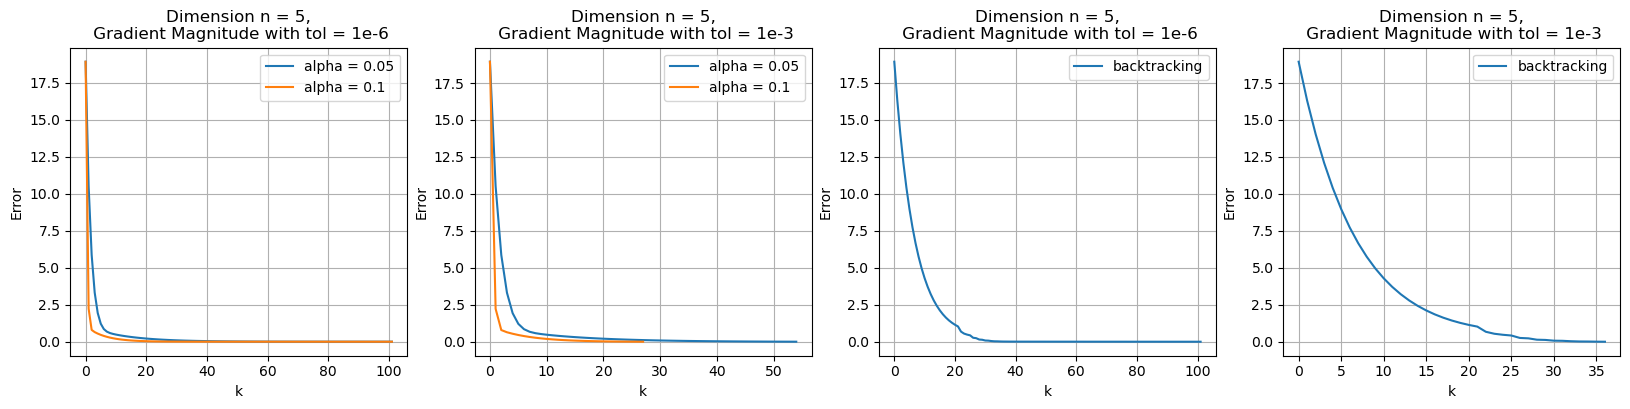



Dimension n = 10:

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  35
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  27
----------------------------------


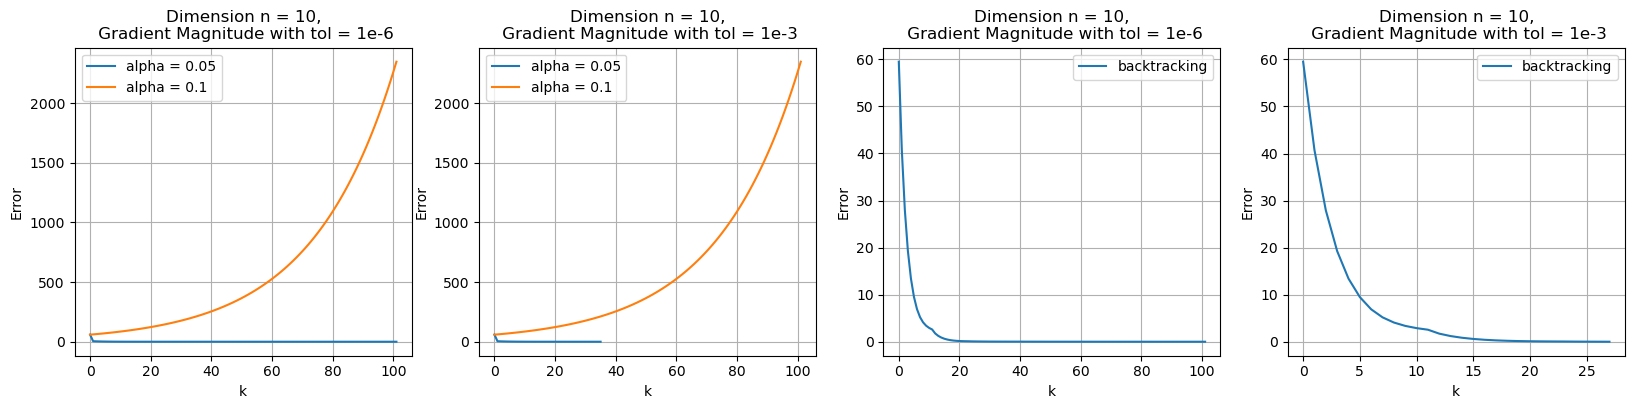



Dimension n = 15:

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  27
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  45
----------------------------------


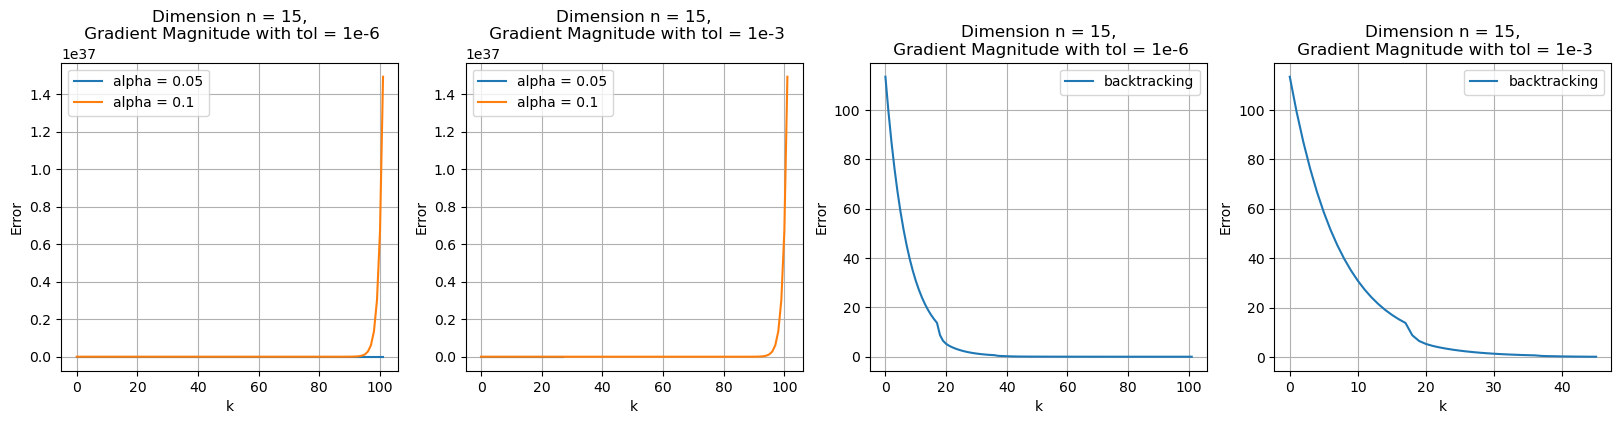

In [13]:
N = [5, 10, 15]
tolx = [1e-6, 1e-3]
tolf = [1e-6, 1e-3]
alpha = [0.05, 0.1]

for n in N:
    #define x0 inital guess
    x0 = np.zeros((n,))
    
    x_tol0 = []
    x_tol1 = []
    k_tol0 = []
    k_tol1 = []
    f_val_tol0 = []
    f_val_tol1 = []
    grads_tol0 = []
    grads_tol1 = []
    err_tol0 = []
    err_tol1 = []

    for i in range(len(alpha)):
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f3, grad_f3, x0, kmax, tolf[0], tolx[0], alpha[i])
        x_tol0.append(x_i)
        k_tol0.append(k_i)
        f_val_tol0.append(f_val_i)
        grads_tol0.append(grads_i)
        err_tol0.append(err_i)
        
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f3, grad_f3, x0, kmax, tolf[1], tolx[1], alpha[i])
        x_tol1.append(x_i)
        k_tol1.append(k_i)
        f_val_tol1.append(f_val_i)
        grads_tol1.append(grads_i)
        err_tol1.append(err_i)
    
    #now do with backtracking
    x_bck_tol0, k_bck_tol0, f_val_bck_tol0, grads_bck_tol0, err_bck_tol0 = GradientDescent(f3, grad_f3, x0, kmax, tolf[0], tolx[0], backtracking=True)
    x_bck_tol1, k_bck_tol1, f_val_bck_tol1, grads_bck_tol1, err_bck_tol1 = GradientDescent(f3, grad_f3, x0, kmax, tolf[1], tolx[1], backtracking=True)

    print(f'\n\nDimension n = {n}:\n')
    for i in range(len(alpha)):
        print('alpha = ', alpha[i])
        print('Number of iterations with tol = 1e-6: ', k_tol0[i])
        print('Number of iterations with tol = 1e-3: ', k_tol1[i])
        print('----------------------------------')
        
    #print backtracking results
    print('Backtracking results:')
    print('Number of iterations with tol = 1e-6: ', k_bck_tol0)
    print('Number of iterations with tol = 1e-3: ', k_bck_tol1)
    print('----------------------------------')
    
    
    #plotting gradient magnitude for each n
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 4, 1)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol0[i]+1), err_tol0[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Gradient Magnitude with tol = 1e-6')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
        
    plt.subplot(1, 4, 2)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol1[i]+1), err_tol1[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Gradient Magnitude with tol = 1e-3')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 3)
    plt.plot(range(0,k_bck_tol0+1), err_bck_tol0, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Gradient Magnitude with tol = 1e-6')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 4)
    plt.plot(range(0,k_bck_tol1+1), err_bck_tol1, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Gradient Magnitude with tol = 1e-3')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.show()


* The Vandermonde Matrix is ill-conditioned with the increasing of n. Backtracking compensates with alpha value choice.

### Test algorithm with function 4:
$f : R^n → R$ such that:
$$f(x) = \frac{1}{2} \|Ax - b\|_2^2 + \frac{\lambda}{2}\|x\|^2_2$$

where $A$ and $b$ are the same of the exercise above, while $λ$ is a fixed value in the interval $[0,1]$.
Try different values for $λ$.



In [14]:
#lamda = 0.1
def f4(x_, lmbd_ = 0.1):
    n = x_.shape[0]   
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((n,))
    b = A @ x_true
    return (0.5 * np.linalg.norm(A @ x_ - b) + lmbd_ / 2 * np.linalg.norm(x_)**2)

def grad_f4(x_, lmbd_ = 0.1):
    n = x_.shape[0]
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((n,))
    b = A @ x_true
    return A.T@(A@x_-b) + lmbd_*x_


Dimension n = 5:
Lamba = 0.1

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  50
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  25
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


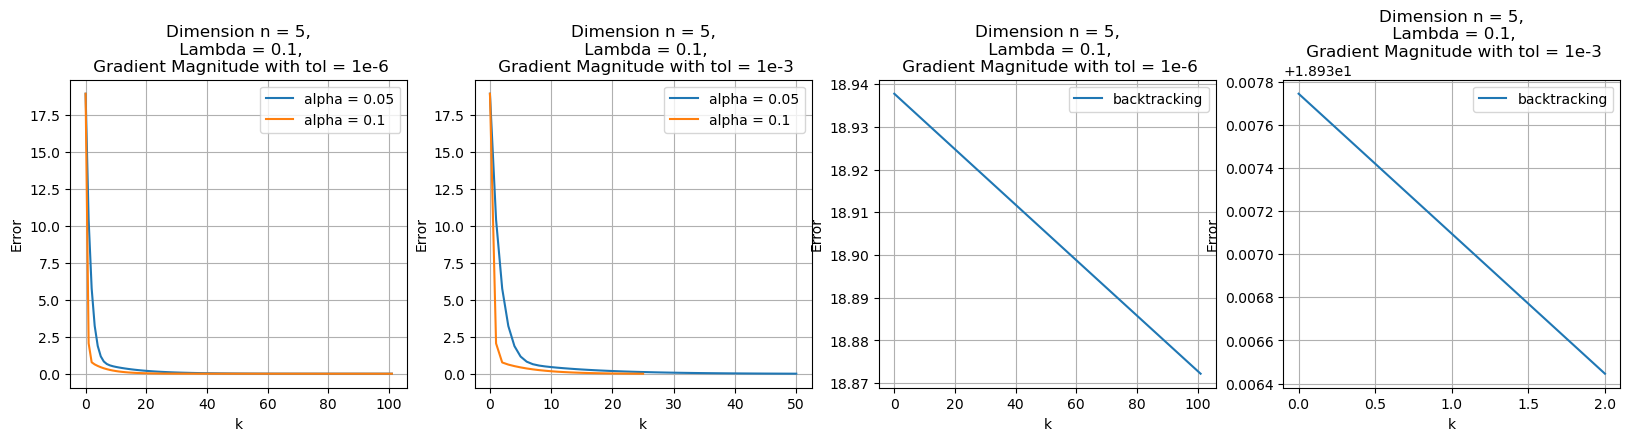


Dimension n = 10:
Lamba = 0.1

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  30
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


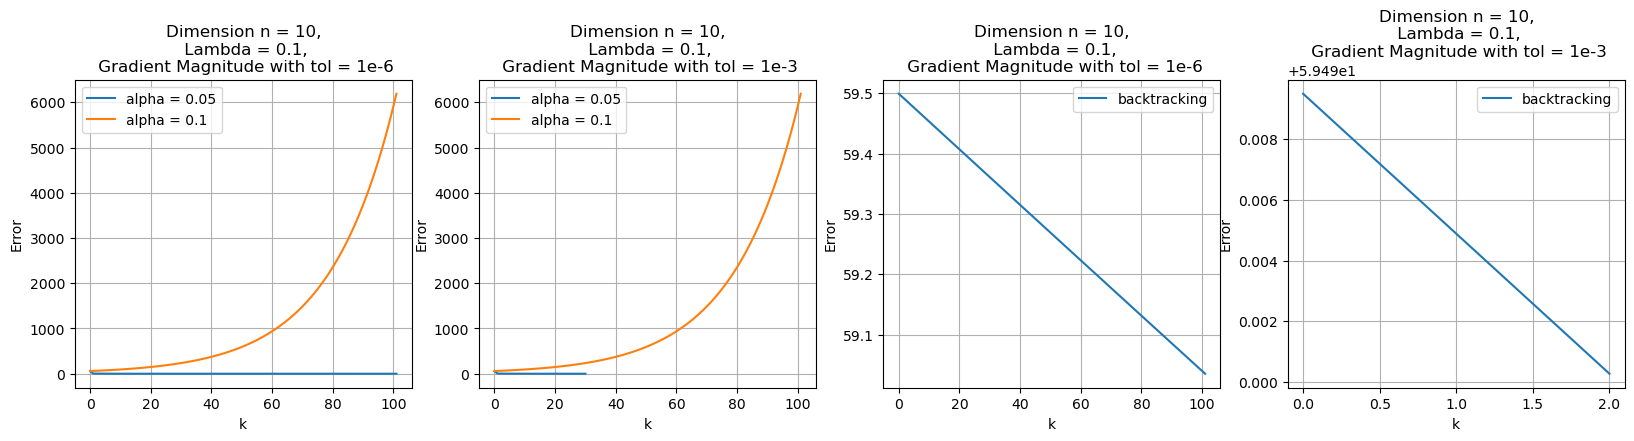


Dimension n = 15:
Lamba = 0.1

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  25
----------------------------------
alpha =  0.1
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


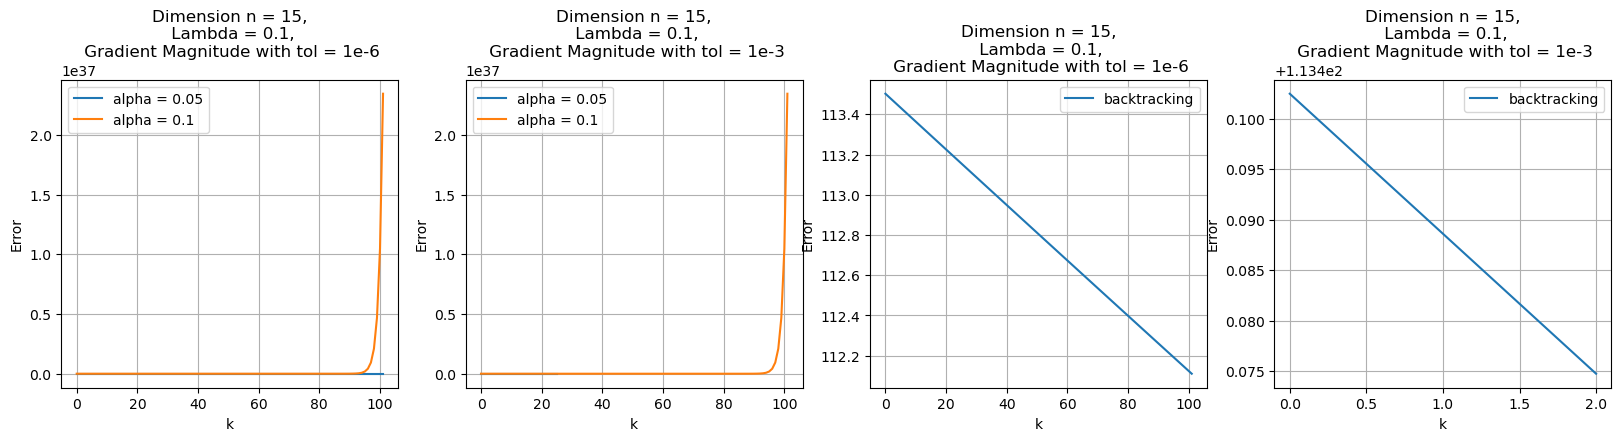

In [15]:
N = [5, 10, 15]

tolf = [1e-6, 1e-3]
tolx = [1e-6, 1e-3]
alpha = [0.05, 0.1]

for n in N:
    #define x0 inital guess
    x0 = np.zeros((n,))
    
    x_tol0 = []
    x_tol1 = []
    k_tol0 = []
    k_tol1 = []
    f_val_tol0 = []
    f_val_tol1 = []
    grads_tol0 = []
    grads_tol1 = []
    err_tol0 = []
    err_tol1 = []

    for i in range(len(alpha)):
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f4, grad_f4, x0, kmax, tolf[0], tolx[0], alpha[i])
        x_tol0.append(x_i)
        k_tol0.append(k_i)
        f_val_tol0.append(f_val_i)
        grads_tol0.append(grads_i)
        err_tol0.append(err_i)
        
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f4, grad_f4, x0, kmax, tolf[1], tolx[1], alpha[i])
        x_tol1.append(x_i)
        k_tol1.append(k_i)
        f_val_tol1.append(f_val_i)
        grads_tol1.append(grads_i)
        err_tol1.append(err_i)
    
    #now do with backtracking
    x_bck_tol0, k_bck_tol0, f_val_bck_tol0, grads_bck_tol0, err_bck_tol0 = GradientDescent(f4, grad_f4, x0, kmax, tolf[0], tolx[0], backtracking=True)
    x_bck_tol1, k_bck_tol1, f_val_bck_tol1, grads_bck_tol1, err_bck_tol1 = GradientDescent(f4, grad_f4, x0, kmax, tolf[1], tolx[1], backtracking=True)

    print(f'\nDimension n = {n}:')
    print('Lamba = 0.1\n')
    
    for i in range(len(alpha)):
        print('alpha = ', alpha[i])
        print('Number of iterations with tol = 1e-6: ', k_tol0[i])
        print('Number of iterations with tol = 1e-3: ', k_tol1[i])
        print('----------------------------------')
        
    #print backtracking results
    print('Backtracking results:')
    print('Number of iterations with tol = 1e-6: ', k_bck_tol0)
    print('Number of iterations with tol = 1e-3: ', k_bck_tol1)
    print('----------------------------------')
    
    
    #plotting gradient magnitude for each n
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 4, 1)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol0[i]+1), err_tol0[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Lambda = 0.1,\n Gradient Magnitude with tol = 1e-6')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
        
    plt.subplot(1, 4, 2)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol1[i]+1), err_tol1[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Lambda = 0.1,\n Gradient Magnitude with tol = 1e-3')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 3)
    plt.plot(range(0,k_bck_tol0+1), err_bck_tol0, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Lambda = 0.1,\n Gradient Magnitude with tol = 1e-6')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 4)
    plt.plot(range(0,k_bck_tol1+1), err_bck_tol1, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Lambda = 0.1,\n Gradient Magnitude with tol = 1e-3')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.show()


* The regularization parameter penalizes large values of x choices.

Try with different lamdas

In [16]:
def f4(x_, lmbd_ = 1e-10):
    n = x_.shape[0]   
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((n,))
    b = A @ x_true
    return (0.5 * np.linalg.norm(A @ x_ - b) + lmbd_ / 2 * np.linalg.norm(x_)**2)

def grad_f4(x_, lmbd_ = 1e-10):
    n = x_.shape[0]
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones((n,))
    b = A @ x_true
    return A.T@(A@x_-b) + lmbd_*x_


Dimension n = 5:
Lamba = 1e-10

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  54
----------------------------------
alpha =  0.001
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


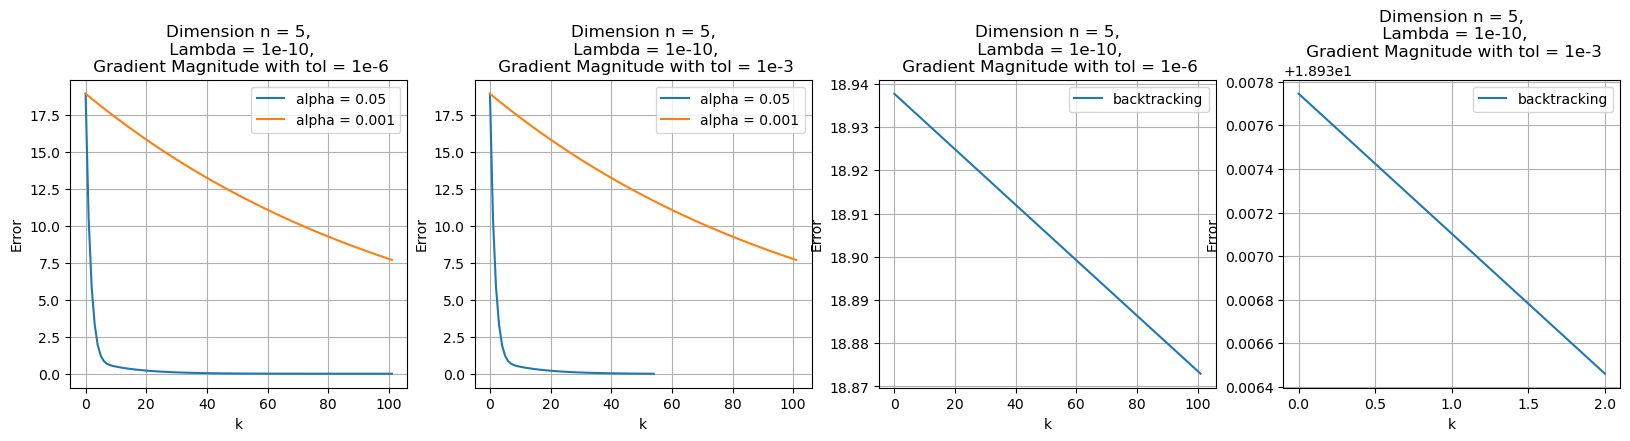


Dimension n = 10:
Lamba = 1e-10

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  35
----------------------------------
alpha =  0.001
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


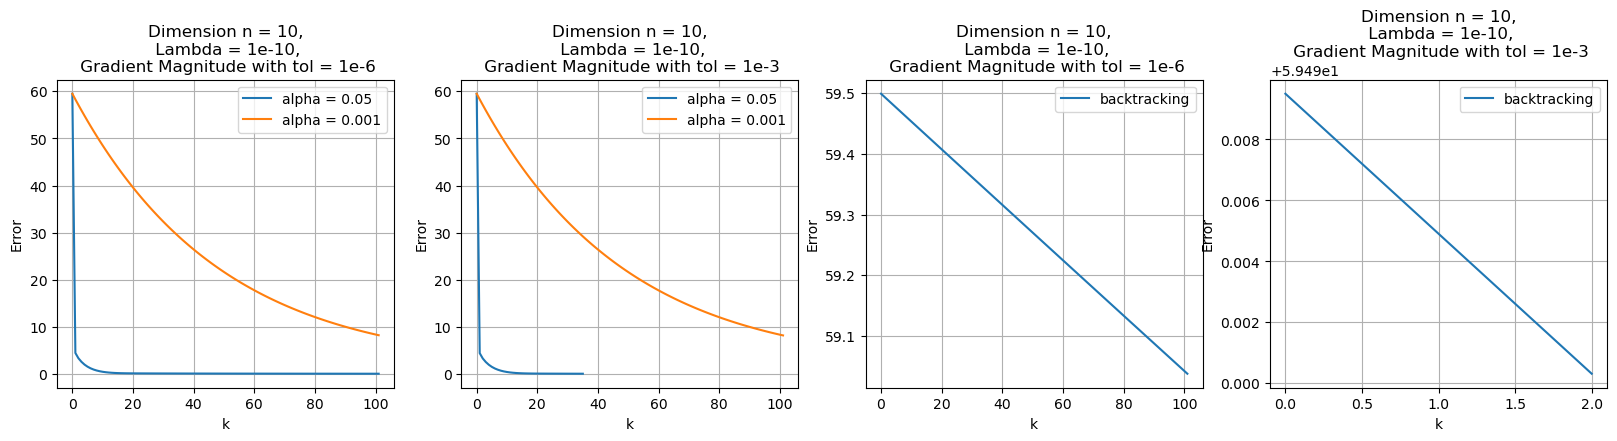


Dimension n = 15:
Lamba = 1e-10

alpha =  0.05
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  27
----------------------------------
alpha =  0.001
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
Number of iterations with tol = 1e-3:  2
----------------------------------


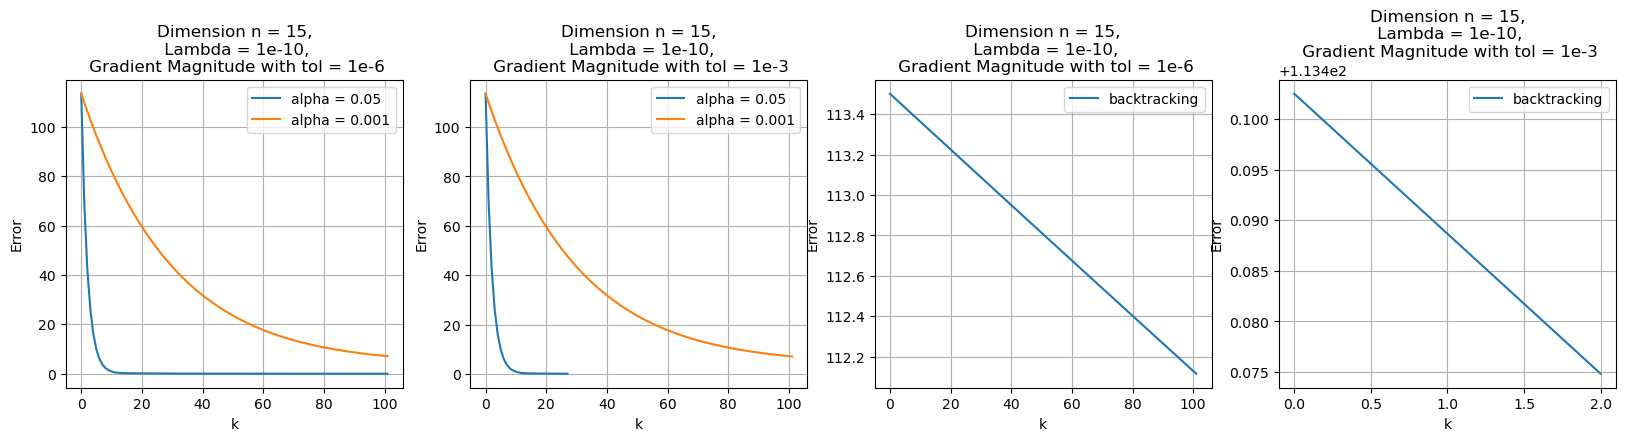

In [17]:
N = [5, 10, 15]

tolf = [1e-6, 1e-3]
tolx = [1e-6, 1e-3]
alpha = [0.05, 1e-3]

for n in N:
    #define x0 inital guess
    x0 = np.zeros((n,))
    
    x_tol0 = []
    x_tol1 = []
    k_tol0 = []
    k_tol1 = []
    f_val_tol0 = []
    f_val_tol1 = []
    grads_tol0 = []
    grads_tol1 = []
    err_tol0 = []
    err_tol1 = []

    for i in range(len(alpha)):
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f4, grad_f4, x0, kmax, tolf[0], tolx[0], alpha[i])
        x_tol0.append(x_i)
        k_tol0.append(k_i)
        f_val_tol0.append(f_val_i)
        grads_tol0.append(grads_i)
        err_tol0.append(err_i)
        
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f4, grad_f4, x0, kmax, tolf[1], tolx[1], alpha[i])
        x_tol1.append(x_i)
        k_tol1.append(k_i)
        f_val_tol1.append(f_val_i)
        grads_tol1.append(grads_i)
        err_tol1.append(err_i)
    
    #now do with backtracking
    x_bck_tol0, k_bck_tol0, f_val_bck_tol0, grads_bck_tol0, err_bck_tol0 = GradientDescent(f4, grad_f4, x0, kmax, tolf[0], tolx[0], backtracking=True)
    x_bck_tol1, k_bck_tol1, f_val_bck_tol1, grads_bck_tol1, err_bck_tol1 = GradientDescent(f4, grad_f4, x0, kmax, tolf[1], tolx[1], backtracking=True)

    print(f'\nDimension n = {n}:')
    print('Lamba = 1e-10\n')
    
    for i in range(len(alpha)):
        print('alpha = ', alpha[i])
        print('Number of iterations with tol = 1e-6: ', k_tol0[i])
        print('Number of iterations with tol = 1e-3: ', k_tol1[i])
        print('----------------------------------')
        
    #print backtracking results
    print('Backtracking results:')
    print('Number of iterations with tol = 1e-6: ', k_bck_tol0)
    print('Number of iterations with tol = 1e-3: ', k_bck_tol1)
    print('----------------------------------')
    
    
    #plotting gradient magnitude for each n
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 4, 1)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol0[i]+1), err_tol0[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Lambda = 1e-10,\n Gradient Magnitude with tol = 1e-6')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
        
    plt.subplot(1, 4, 2)
    for i in range(len(alpha)):
        plt.plot(range(0,k_tol1[i]+1), err_tol1[i], label = 'alpha = ' + str(alpha[i]))

    plt.title(f'Dimension n = {n},\n Lambda = 1e-10,\n Gradient Magnitude with tol = 1e-3')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 3)
    plt.plot(range(0,k_bck_tol0+1), err_bck_tol0, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Lambda = 1e-10,\n Gradient Magnitude with tol = 1e-6')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 4, 4)
    plt.plot(range(0,k_bck_tol1+1), err_bck_tol1, label = 'backtracking')
    plt.title(f'Dimension n = {n},\n Lambda = 1e-10,\n Gradient Magnitude with tol = 1e-3')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.show()


### Test algorithm with function 5:
$f : R → R$ such that:
$$f(x) = x^4 + x^3 -2x^2 -2x$$



Only for the non-convex function defined in 5, plot it in the interval [−3, 3] and test the convergence point of GD with different values of x0 and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.


In [18]:
def f5(x_):
    return ( (x_**4) + (x_**3) - (2 * x_**2) - (2 * x_))

def grad_f5(x_):
    return np.array(4 * x_**3 + 3 * x_ **2 - 4 * x_ - 2)


x0 = -3:

alpha =  0.001
Number of iterations with tol = 1e-6:  101
----------------------------------
alpha =  0.01
Number of iterations with tol = 1e-6:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  101
----------------------------------


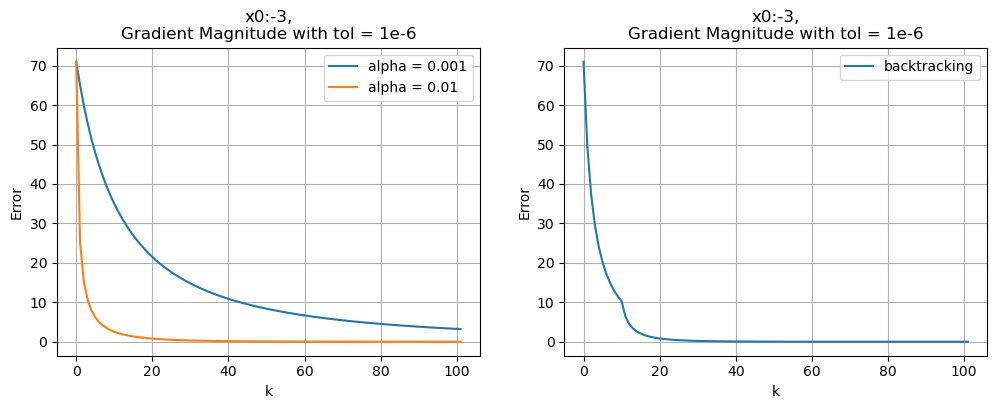

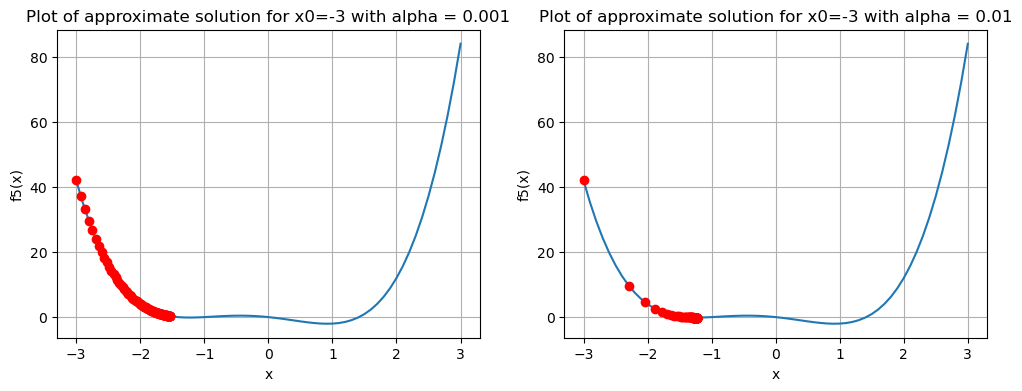


x0 = 0:

alpha =  0.001
Number of iterations with tol = 1e-6:  101
----------------------------------
alpha =  0.01
Number of iterations with tol = 1e-6:  101
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  60
----------------------------------


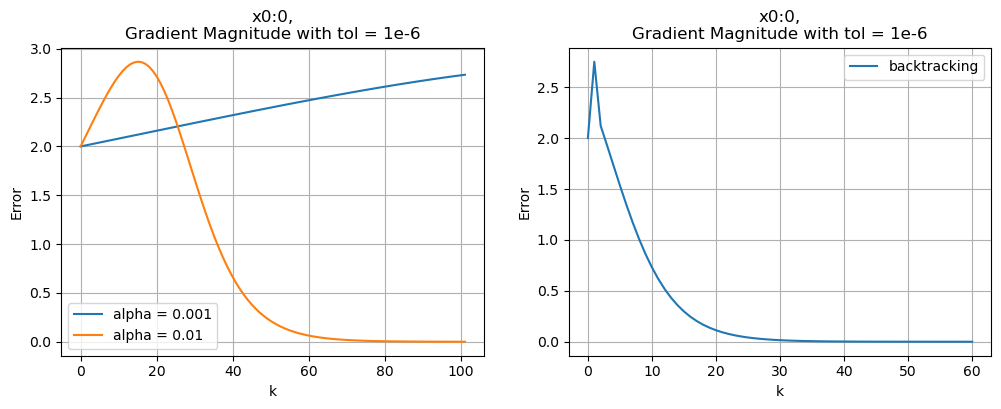

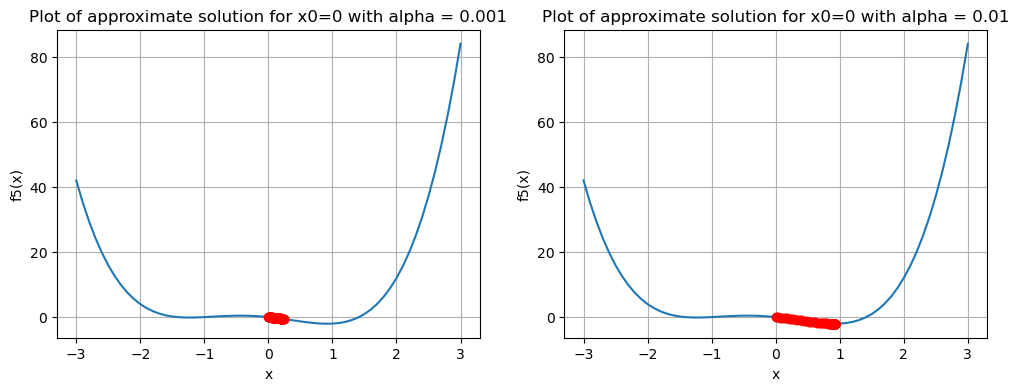


x0 = 3:

alpha =  0.001
Number of iterations with tol = 1e-6:  101
----------------------------------
alpha =  0.01
Number of iterations with tol = 1e-6:  86
----------------------------------
Backtracking results:
Number of iterations with tol = 1e-6:  65
----------------------------------


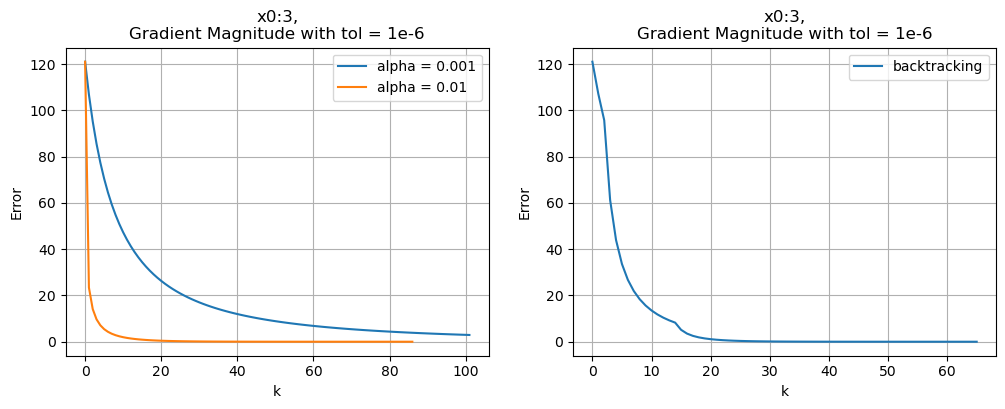

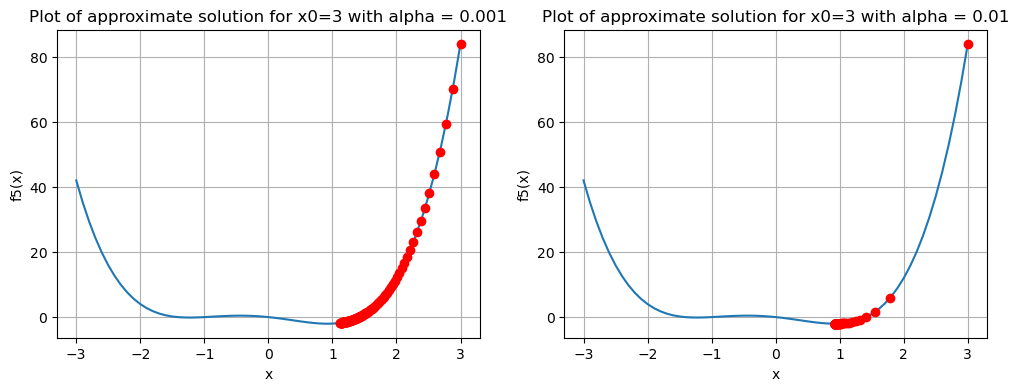

In [19]:
X0 = [-3, 0, 3]
kmax = 100

#try with different tollerances and step sizes
tolf = [1e-6]
tolx = [1e-6]
alpha = [1e-3, 1e-2]

for x0 in X0:

    x = []
    k = []
    f_val = []
    grads = []
    err = []

    for i in range(len(alpha)):
        x_i, k_i, f_val_i, grads_i, err_i = GradientDescent(f5, grad_f5, x0, kmax, tolf[0], tolx[0], alpha[i])
        x.append(x_i)
        k.append(k_i)
        f_val.append(f_val_i)
        grads.append(grads_i)
        err.append(err_i)
        
    #now do with backtracking
    x_bck, k_bck, f_val_bck, grads_bck, err_bck = GradientDescent(f5, grad_f5, x0, kmax, tolf[0], tolx[0], backtracking=True)

    print(f'\nx0 = {x0}:\n')
    for i in range(len(alpha)):
        print('alpha = ', alpha[i])
        print('Number of iterations with tol = 1e-6: ', k[i])
        print('----------------------------------')
        
    #print backtracking results
    print('Backtracking results:')
    print('Number of iterations with tol = 1e-6: ', k_bck)
    print('----------------------------------') 
    
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    for i in range(len(alpha)):
        plt.plot(range(0,k[i]+1), err[i], label = 'alpha = ' + str(alpha[i]))
        
    plt.title(f'x0:{x0},\nGradient Magnitude with tol = 1e-6')    
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(range(0,k_bck+1), err_bck, label = 'backtracking')
    plt.title(f'x0:{x0},\nGradient Magnitude with tol = 1e-6')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()

    plt.show()
    
    
        
    plt.figure(figsize=(12, 4))
    for i in range(len(alpha)):
        plt.subplot(1, 2, i+1)
    
        #plot function in range -3,3
        rng=np.arange(-3, 3.01, 0.1)
        f5_range = [] 
        for x_point in rng:
            f5_range.append(f5(x_point))
            
        plt.plot(rng, f5_range)
        plt.plot(x[i], f_val[i],'o', color='red')
        plt.title(f'Plot of approximate solution for x0={x0} with alpha = {alpha[i]}')
        plt.xlabel('x')
        plt.ylabel('f5(x)')
        plt.grid()

    plt.show()


Non convex function.
With starting point $x_0 = 0$ $\alpha = 1e-3$ results being too small to reach convergence and end for maximum number of iterations.